In [1]:
from GQLib.Framework import Framework
from GQLib.Optimizers import MPGA, PSO, SA, SGA

In [2]:
start_date = "10/04/2006"
end_date = "14/11/2016"

# ETUDE DAILY

In [3]:
fw_wti = Framework('daily')
data_wti = fw_wti.select_sample(fw_wti.data, start_date, end_date)
fw_uso = Framework('daily', is_uso=True)
data_uso = fw_uso.select_sample(fw_uso.data, start_date, end_date)
dates_wti = fw_wti.global_dates[data_wti[:, 0].astype(int)]
dates_uso = fw_uso.global_dates[data_uso[:, 0].astype(int)]

(array([12418., 13149., 13879., 14610., 15340., 16071., 16801., 17532.]),
 [Text(12418.0, 0, '2004'),
  Text(13149.0, 0, '2006'),
  Text(13879.0, 0, '2008'),
  Text(14610.0, 0, '2010'),
  Text(15340.0, 0, '2012'),
  Text(16071.0, 0, '2014'),
  Text(16801.0, 0, '2016'),
  Text(17532.0, 0, '2018')])

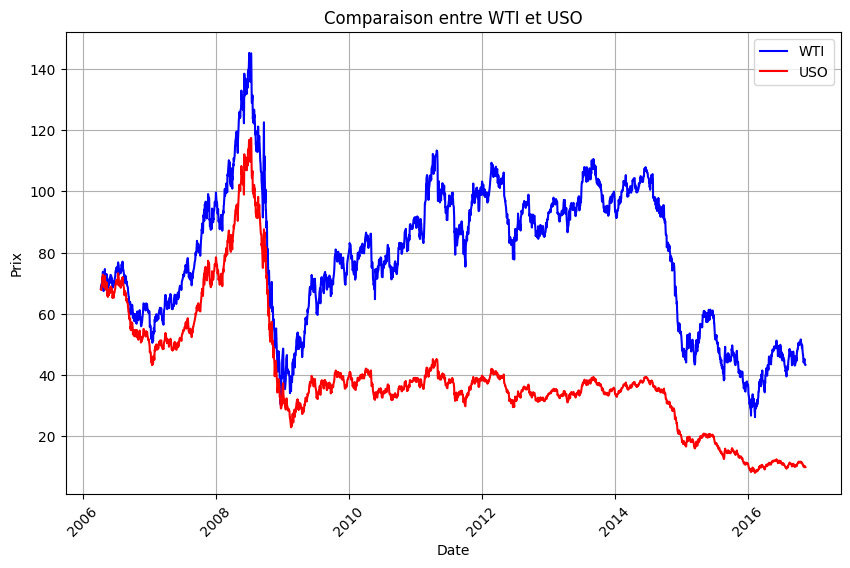

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(dates_wti, data_wti[:, 1], label='WTI', color='blue', linestyle='-')
plt.plot(dates_uso, data_uso[:, 1], label='USO', color='red', linestyle='-')
plt.title('Comparaison entre WTI et USO')
# Ajouter des labels d'axes
plt.xlabel('Date')
plt.ylabel('Prix')
# Ajouter une légende
plt.legend()
# Ajouter une grille
plt.grid(True)
# Formater l'axe des x pour afficher les dates correctement (si ce sont des objets datetime ou Timestamp)
plt.xticks(rotation=45)

In [5]:

import numpy as np
common_dates = np.intersect1d(dates_wti, dates_uso)

# Filtrer les données de data_wti et data_uso pour ne garder que les dates communes
filtered_wti = data_wti[np.isin(dates_wti, common_dates)]
filtered_uso = data_uso[np.isin(dates_uso, common_dates)]

# Calculer la corrélation entre les prix des deux séries pour les dates communes
correlation = np.corrcoef(filtered_wti[:, 1], filtered_uso[:, 1])[0, 1]

print(f"La corrélation entre WTI et USO est : {correlation}")

La corrélation entre WTI et USO est : 0.6029338170538019


## WEEKLY

In [6]:
fw_wti = Framework('weekly')
data_wti = fw_wti.select_sample(fw_wti.data, start_date, end_date)
fw_uso = Framework('weekly', is_uso=True)
data_uso = fw_uso.select_sample(fw_uso.data, start_date, end_date)
dates_wti = fw_wti.global_dates[data_wti[:, 0].astype(int)]
dates_uso = fw_uso.global_dates[data_uso[:, 0].astype(int)]

(array([12418., 13149., 13879., 14610., 15340., 16071., 16801., 17532.]),
 [Text(12418.0, 0, '2004'),
  Text(13149.0, 0, '2006'),
  Text(13879.0, 0, '2008'),
  Text(14610.0, 0, '2010'),
  Text(15340.0, 0, '2012'),
  Text(16071.0, 0, '2014'),
  Text(16801.0, 0, '2016'),
  Text(17532.0, 0, '2018')])

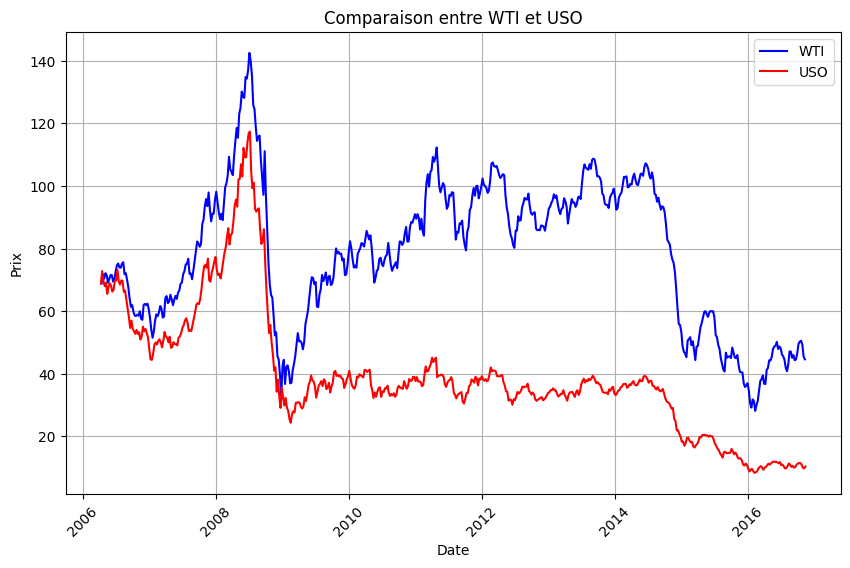

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(dates_wti, data_wti[:, 1], label='WTI', color='blue', linestyle='-')
plt.plot(dates_uso, data_uso[:, 1], label='USO', color='red', linestyle='-')
plt.title('Comparaison entre WTI et USO')
# Ajouter des labels d'axes
plt.xlabel('Date')
plt.ylabel('Prix')
# Ajouter une légende
plt.legend()
# Ajouter une grille
plt.grid(True)
# Formater l'axe des x pour afficher les dates correctement (si ce sont des objets datetime ou Timestamp)
plt.xticks(rotation=45)

In [8]:
correlation = np.corrcoef(data_wti[:, 1], data_uso[1:, 1])[0, 1]

print(f"La corrélation entre WTI et USO est : {correlation}")

La corrélation entre WTI et USO est : 0.5978794695728392


## Generation des TC

Processing subintervals:   0%|          | 0/90 [00:00<?, ?subinterval/s]c:\Users\bapdu\COMMUN\Dauphine\Predicting-Oil-Price-Turning-Points\GQLib\njitFunc.py:234: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 2, 'F', False, aligned=True), Array(float64, 1, 'A', False, aligned=True))
  params = np.linalg.inv(V.T @ V) @ (V.T @ y)
Analyzing results: 100%|██████████| 90/90 [00:15<00:00,  5.91result/s]


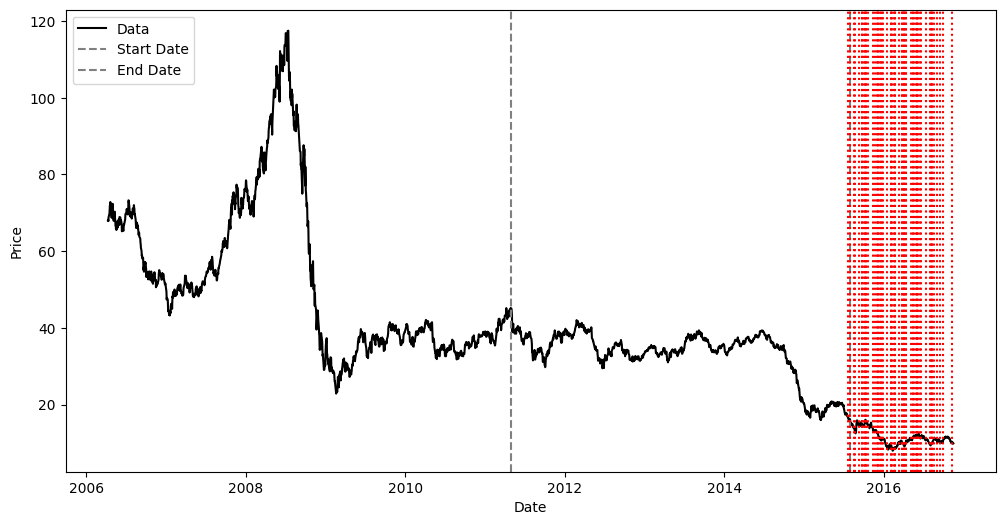

In [9]:
fw_uso = Framework("daily", is_uso = True)
# On renseigne les dates du sample et l'optimiseur à utiliser
optimizer = MPGA()
results = fw_uso.process("29/04/2011", "01/08/2015", optimizer)

# On check la significativité des résultats
best_results = fw_uso.analyze(results)
# On peut visualiser les résultats finaux
fw_uso.visualize(best_results)

### Extension jusqu a ajd

(array([ 3652.,  5479.,  7305.,  9131., 10957., 12784., 14610., 16436.,
        18262., 20089., 21915.]),
 [Text(3652.0, 0, '1980'),
  Text(5479.0, 0, '1985'),
  Text(7305.0, 0, '1990'),
  Text(9131.0, 0, '1995'),
  Text(10957.0, 0, '2000'),
  Text(12784.0, 0, '2005'),
  Text(14610.0, 0, '2010'),
  Text(16436.0, 0, '2015'),
  Text(18262.0, 0, '2020'),
  Text(20089.0, 0, '2025'),
  Text(21915.0, 0, '2030')])

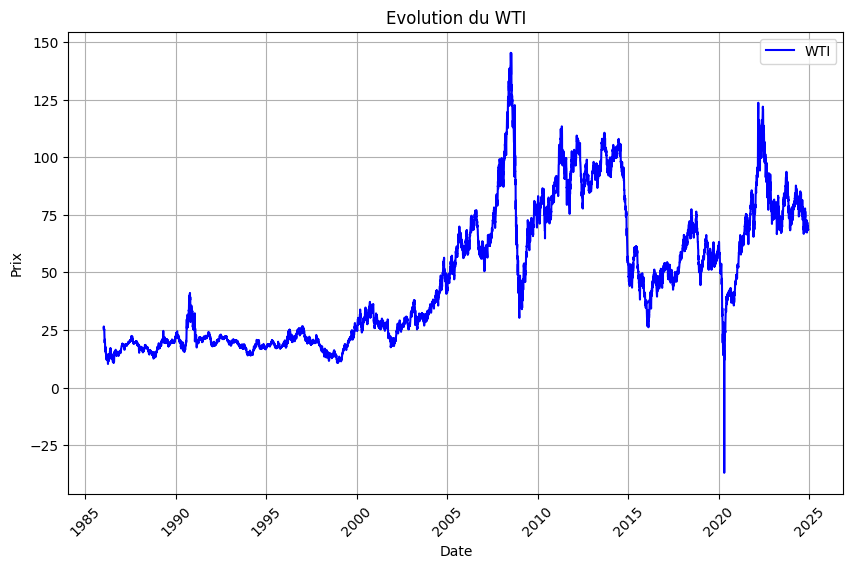

In [9]:
fw_wti = Framework('daily')
plt.figure(figsize=(10, 6))
plt.plot(fw_wti.global_dates, fw_wti.global_prices, label='WTI', color='blue', linestyle='-')
plt.title('Evolution du WTI')
# Ajouter des labels d'axes
plt.xlabel('Date')
plt.ylabel('Prix')
# Ajouter une légende
plt.legend()
# Ajouter une grille
plt.grid(True)
# Formater l'axe des x pour afficher les dates correctement (si ce sont des objets datetime ou Timestamp)
plt.xticks(rotation=45)


(array([18262., 18293., 18322., 18353., 18383., 18414., 18444., 18475.,
        18506., 18536., 18567.]),
 [Text(18262.0, 0, '2020-01'),
  Text(18293.0, 0, '2020-02'),
  Text(18322.0, 0, '2020-03'),
  Text(18353.0, 0, '2020-04'),
  Text(18383.0, 0, '2020-05'),
  Text(18414.0, 0, '2020-06'),
  Text(18444.0, 0, '2020-07'),
  Text(18475.0, 0, '2020-08'),
  Text(18506.0, 0, '2020-09'),
  Text(18536.0, 0, '2020-10'),
  Text(18567.0, 0, '2020-11')])

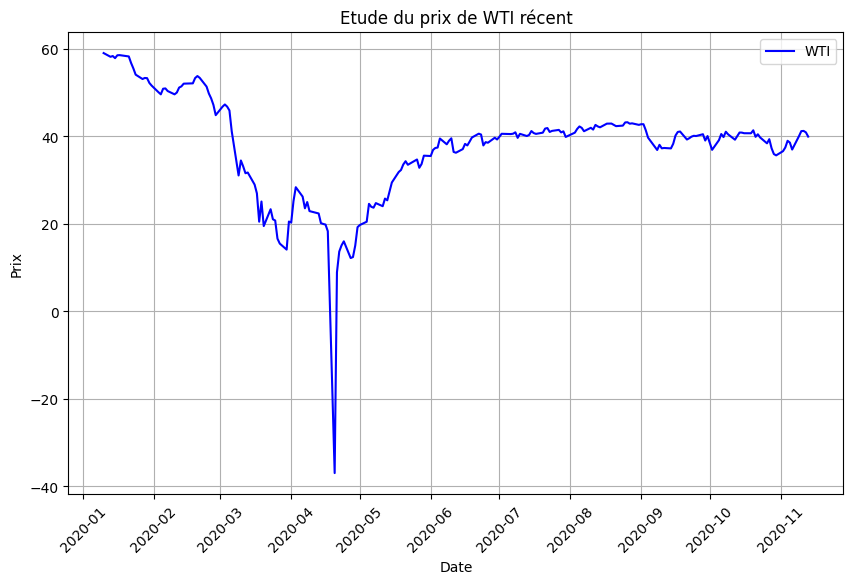

In [14]:
start_date = "10/01/2020"
end_date = "14/11/2020"
fw_wti = Framework('daily')
data_wti = fw_wti.select_sample(fw_wti.data, start_date, end_date)
dates_wti = fw_wti.global_dates[data_wti[:, 0].astype(int)]
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(dates_wti, data_wti[:, 1], label='WTI', color='blue', linestyle='-')
plt.title('Etude du prix de WTI récent')
# Ajouter des labels d'axes
plt.xlabel('Date')
plt.ylabel('Prix')
# Ajouter une légende
plt.legend()
# Ajouter une grille
plt.grid(True)
# Formater l'axe des x pour afficher les dates correctement (si ce sont des objets datetime ou Timestamp)
plt.xticks(rotation=45)

### Etude de la période du 15 Avril 2016 au 15 Nov 2019 

Prediction du Turning point d avril 2020

Si ca ne marche pas c est normal car crash exogene (crise covid)

Processing subintervals:   0%|          | 0/90 [00:00<?, ?subinterval/s]c:\Users\bapdu\COMMUN\Dauphine\Predicting-Oil-Price-Turning-Points\GQLib\njitFunc.py:234: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 2, 'F', False, aligned=True), Array(float64, 1, 'A', False, aligned=True))
  params = np.linalg.inv(V.T @ V) @ (V.T @ y)
Analyzing results: 100%|██████████| 90/90 [00:17<00:00,  5.28result/s]


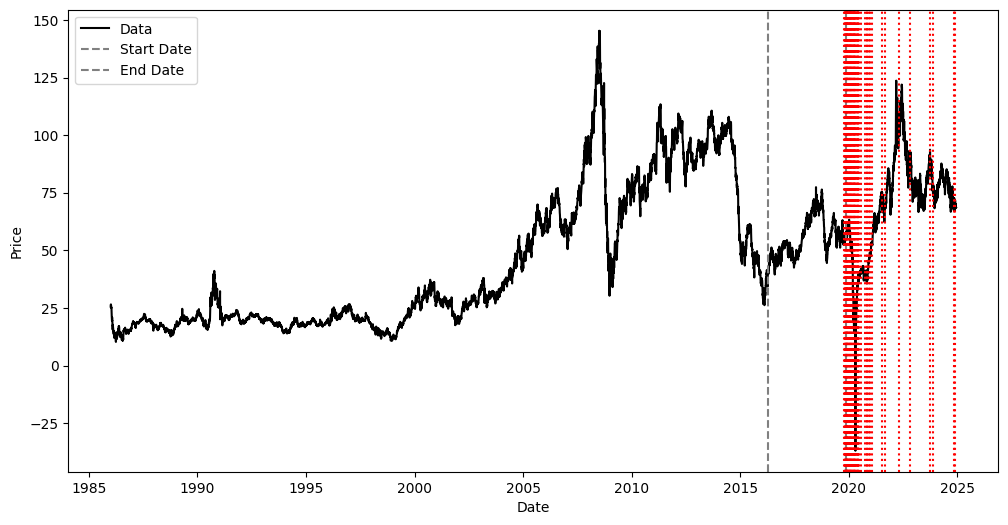

In [16]:
fw = Framework("daily")
# On renseigne les dates du sample et l'optimiseur à utiliser
optimizer = MPGA()
results = fw.process("15/04/2016", "15/11/2019", optimizer)

# On check la significativité des résultats
best_results = fw.analyze(results)
# On peut visualiser les résultats finaux
fw.visualize(best_results)